In [65]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()  # 四个属性 三个类别
X = iris.data
y = iris.target
X = X[:, 2:]

In [66]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

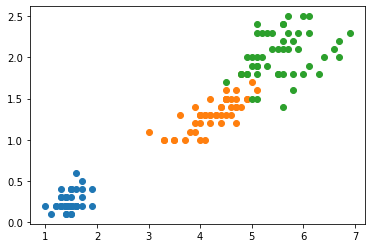

In [67]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [69]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


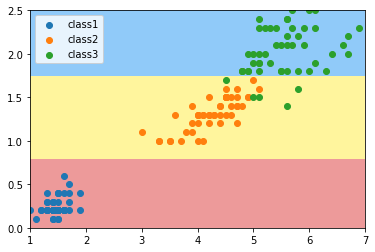

In [70]:
plot_desicion_boundry(dt_clf, [1, 7, 0, 2.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

# information entropy

In [71]:
def informationEnropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

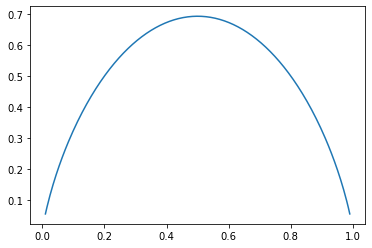

In [72]:
x = np.linspace(0.01, 0.99, 200)   # x不能为0或1
plt.plot(x, informationEnropy(x))
plt.show()

# use entropy

In [73]:
def split(X, y, d, value):
    # 已知d和value对数据进行划分
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    
    return X[index_a], X[index_b], y[index_a], y[index_b]

from collections import Counter
from math import log
def entropy(y):
    counter = Counter(y)  # 字典，{类别：数目}
    entropy = 0.0
    for num in counter.values():
        p = num / len(y)
        entropy += -p * log(p)
    return entropy

def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):  # 遍历每一列（即每一个特征）
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                # 阈值取任意相邻两个数的均值，找使信息熵降低的最好阈值
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

In [74]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [75]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [76]:
entropy(y1_l)  # 降为0，说明左子树的类别全部相同，不需要再分，标记为叶子结点

0.0

In [77]:
entropy(y1_r)

0.6931471805599453

In [78]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy = ", best_entropy2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_entropy =  0.4132278899361904
best_d =  1
best_v =  1.75


In [79]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [80]:
entropy(y2_l)

0.30849545083110386

In [81]:
entropy(y2_r)

0.10473243910508653

In [82]:
# homework: 手写构建树

# use Gini

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt_clf2 = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2)

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


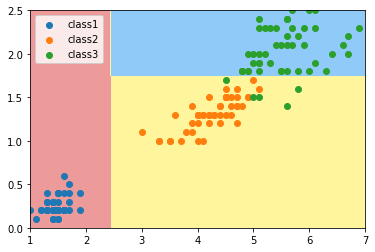

In [84]:
plot_desicion_boundry(dt_clf2, [1, 7, 0, 2.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

In [85]:
def split(X, y, d, value):
    # 已知d和value对数据进行划分
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    
    return X[index_a], X[index_b], y[index_a], y[index_b]

from collections import Counter
from math import log
def gini(y):
    counter = Counter(y)  # 字典，{类别：数目}
    gini = 1
    for num in counter.values():
        p = num / len(y)
        gini -= p ** 2
    return gini

def try_split(X, y):
    best_gini = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):  # 遍历每一列（即每一个特征）
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                # 取任意相邻两个数的均值作为待搜索的阈值，找使信息熵降低的最好阈值
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_gini:
                    best_gini, best_d, best_v = g, d, v
    return best_gini, best_d, best_v

In [86]:
best_gini, best_d, best_v = try_split(X, y)
print("best_gini = ", best_gini)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_gini =  0.5
best_d =  0
best_v =  2.45


In [87]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [88]:
gini(y1_l)

0.0

In [89]:
gini(y1_r)

0.5

In [93]:
best_gini2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_gini2 = ", best_gini2)
print("best_d2 = ", best_d2)
print("best_v2 = ", best_v2)

best_gini2 =  0.2105714900645938
best_d2 =  1
best_v2 =  1.75


In [94]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [95]:
gini(y2_l)

0.1680384087791495

In [96]:
gini(y2_r)

0.04253308128544431

# CART和决策树的超参数

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
X, y = datasets.make_moons(noise=0.25, random_state=666)

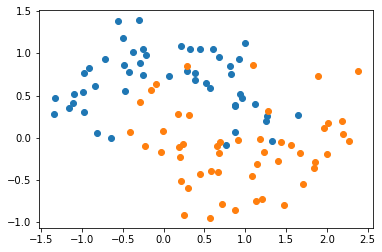

In [98]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier()

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


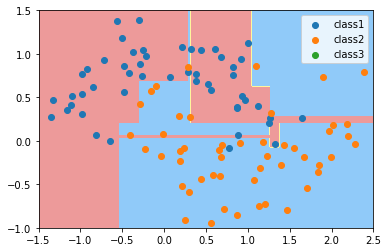

In [102]:
plot_desicion_boundry(dt_clf, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


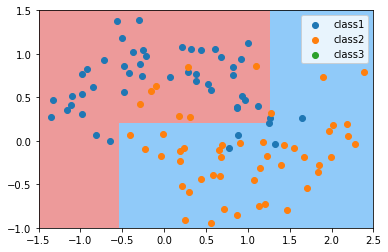

In [106]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)
plot_desicion_boundry(dt_clf2, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


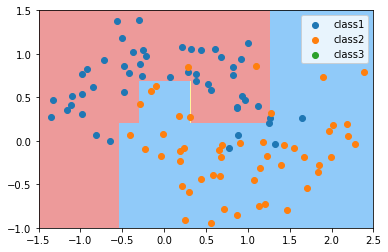

In [107]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)   # 对于一个节点，至少要有多少个样本才继续划分
dt_clf3.fit(X, y)
plot_desicion_boundry(dt_clf3, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


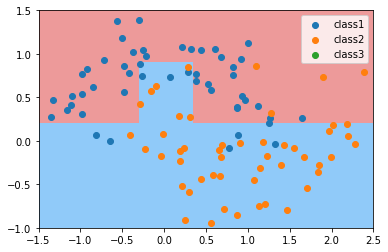

In [108]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)    # 对于一个叶子节点至少要有多少个样本
dt_clf4.fit(X, y)
plot_desicion_boundry(dt_clf4, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()

<ipython-input-69-17721d6e6521>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


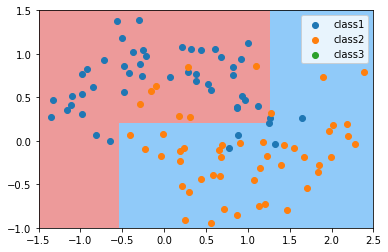

In [109]:
dt_clf4 = DecisionTreeClassifier(max_leaf_nodes=4)   # 叶子结点数
dt_clf4.fit(X, y)
plot_desicion_boundry(dt_clf4, [-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], label="class1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="class2")
plt.scatter(X[y==2, 0], X[y==2, 1], label="class3")
plt.legend()
plt.show()